In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 599M/612M [00:04<00:00, 138MB/s]
100% 612M/612M [00:05<00:00, 128MB/s]


In [ ]:
! unzip gtsrb-german-traffic-sign.zip

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

Setting untuk gambar dan plot diagram

In [ ]:
plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [ ]:
! ls Test | wc -l

12631


In [ ]:
! ls Train/0 | wc -l

210


In [ ]:
! ls 'Train/1' | wc -l

2220


Proses Balancing Data

In [ ]:
data_tambahan = pd.read_csv('Test.csv', delimiter=',', na_values=".")

In [ ]:
data_tambahan.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
print(data_tambahan['Path'][0])

Test/00000.png


In [ ]:
import shutil

files = [data_tambahan['Path'].tolist(),data_tambahan['ClassId'].tolist()]

print(files[0][0])
i=0
for f in data_tambahan['Path']:
  shutil.move(f, 'Train/'+str(files[1][i]))
  i+=1  

Test/00000.png


In [ ]:
min=len(os.listdir('Train/'+str(1)))
for i in range(43):
  if(min>len(os.listdir('Train/'+str(i)))):
    min=len(os.listdir('Train/'+str(i)))
print(min)

270


Menentukan Train dataset, image size dan jumlah kategori

In [ ]:
train_path = 'Train'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [ ]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

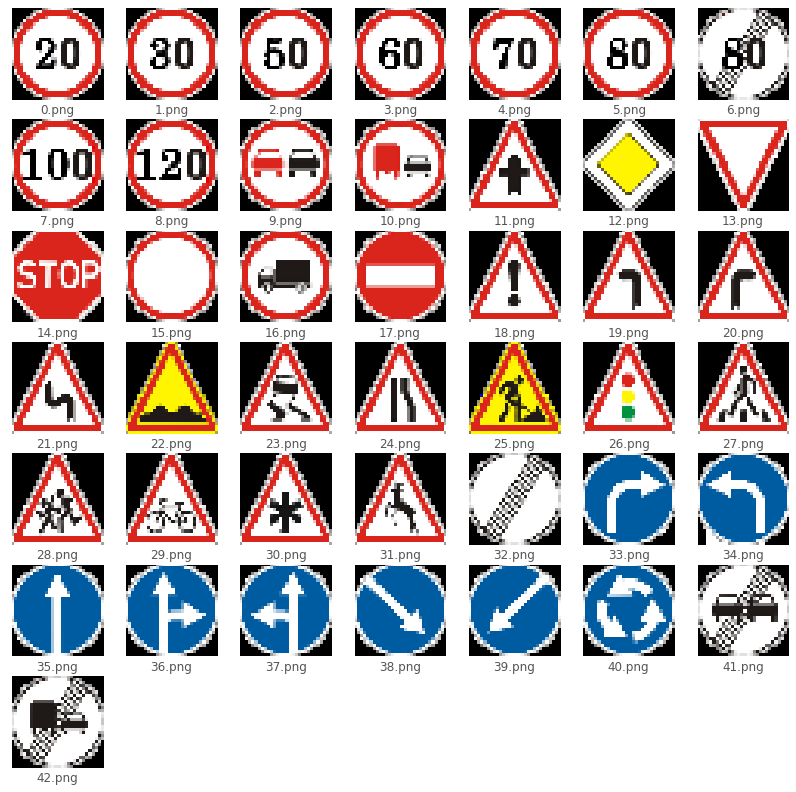

In [ ]:
# Visualizing all the different signs
plt.figure(figsize=(14,14))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = load_img('Meta/'+str(i)+'.png', target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
    plt.xlabel(str(i)+'.png')
plt.show()

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Vehicle > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End of no passing vehicle > 3.5 tons' }

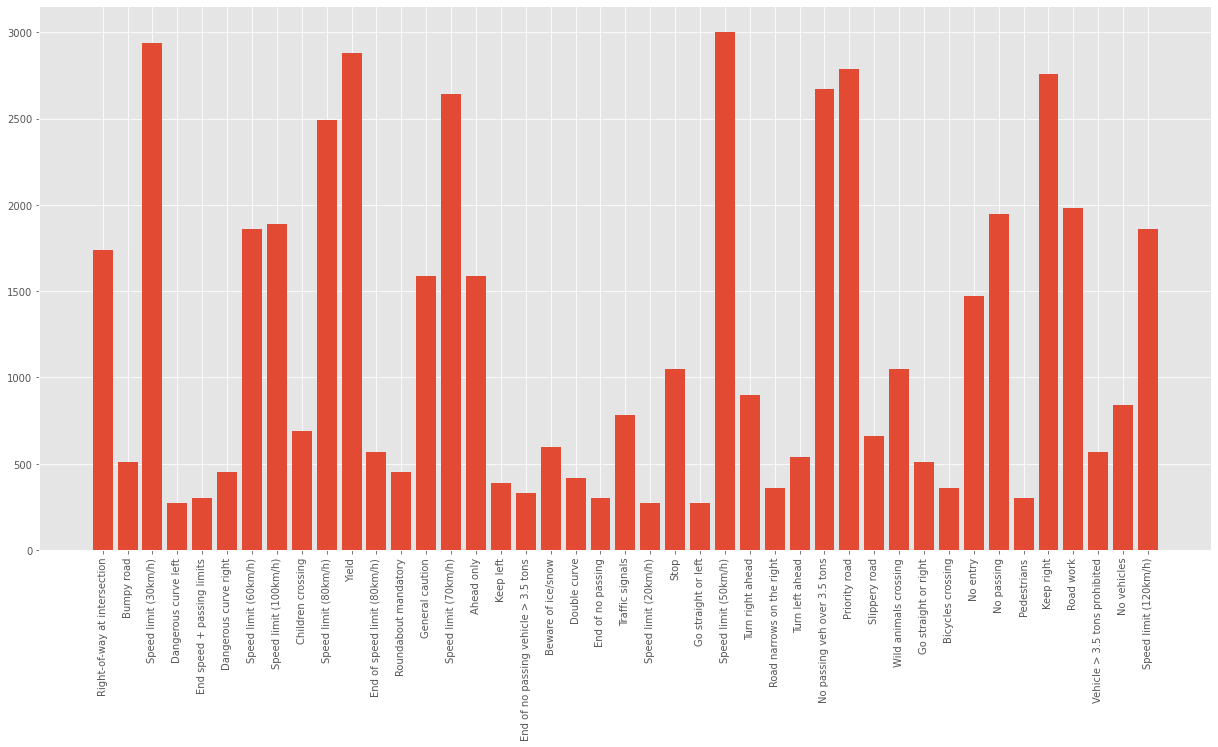

In [ ]:
folders = os.listdir(train_path)


train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])



plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
def load_data(data_dir):
    images = list()
    labels = list()
    jml_data = list()
    class_num  = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        class_num.append(classes[category])
        counter=0
        for img in os.listdir(categories):
            if(counter<400):
              img = load_img(os.path.join(categories, img), target_size=(IMG_HEIGHT, IMG_WIDTH))
              image = img_to_array(img)
              images.append(image)
              labels.append(category)
              counter+=1
            else:
              break
        jml_data.append(counter)
    print(len(jml_data))
    plt.figure(figsize=(21,10))  
    plt.bar(class_num, jml_data)
    plt.xticks(class_num, rotation='vertical')
    plt.show()
    return images, labels

43


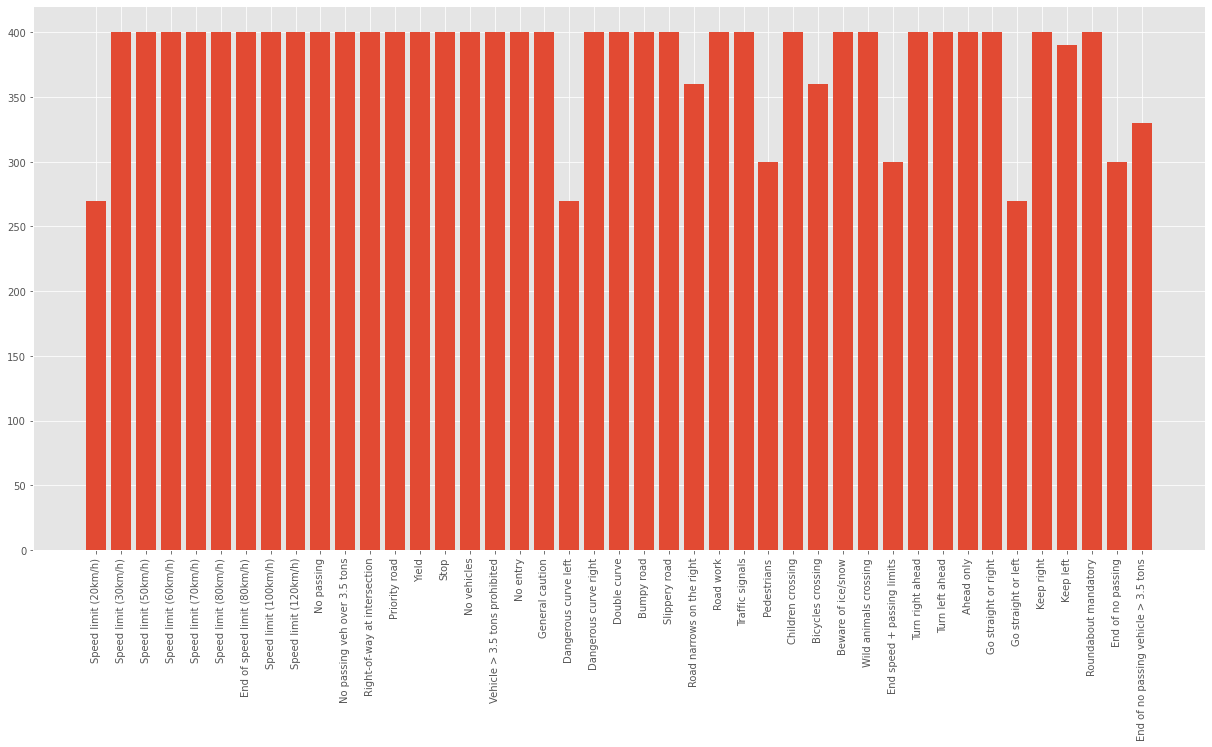

In [ ]:
images, labels = load_data(train_path)

In [ ]:
len(images)

16350

In [ ]:
labels = to_categorical(labels)

43


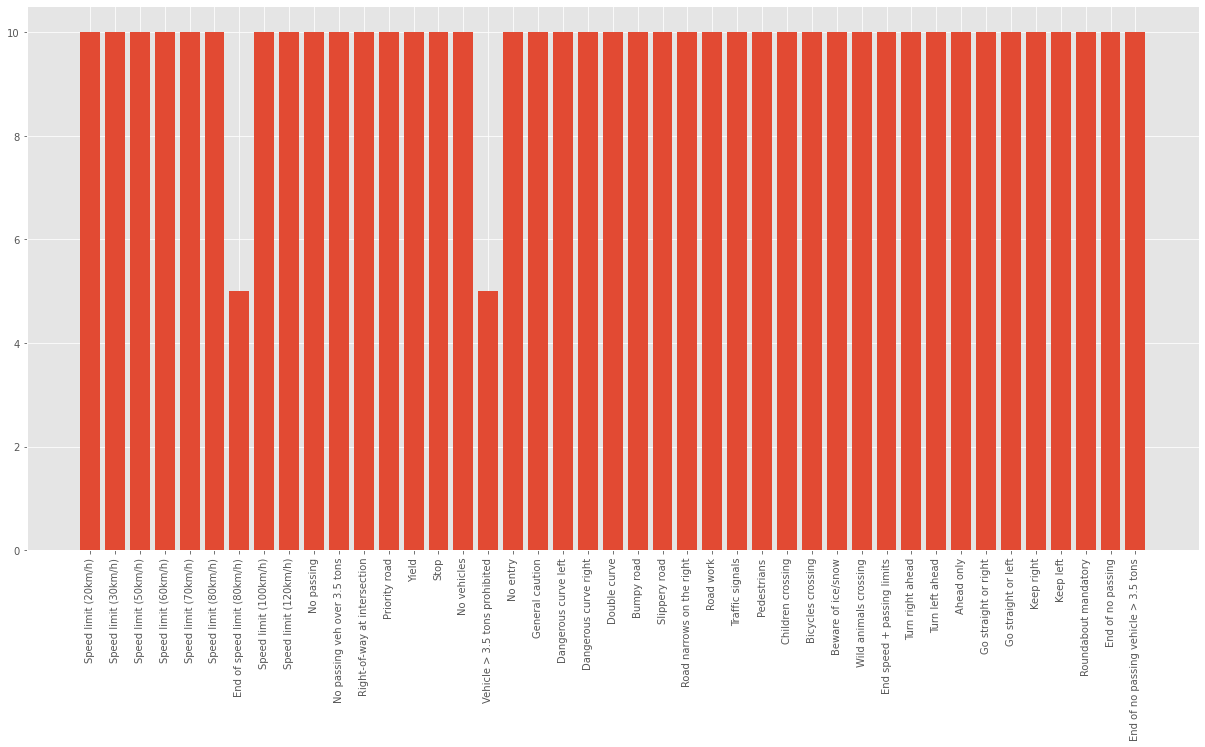

In [ ]:
images2, labels2 = load_data('gdrive/MyDrive/Data Test Sign Traffic')

In [ ]:
labels2 = to_categorical(labels2)

In [ ]:
images2 = np.array(images2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

In [ ]:
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (11445, 30, 30, 3)
Number of images in x_train 11445
Number of images in x_test 4905


In [ ]:
input_shape=( IMG_HEIGHT, IMG_WIDTH, 3)

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
history = model.fit(x_train, y_train,validation_split=0.3,epochs=30)

In [ ]:
#model.save('drive/MyDrive/ml_model_30_e40')

In [ ]:
#np.save('drive/MyDrive/ml_history_30_e40.npy',history.history)

In [ ]:
#history=np.load('gdrive/MyDrive/ml_history_30_e30.npy',allow_pickle='TRUE').item()

In [ ]:
#model = keras.models.load_model('drive/MyDrive/ml_model_30_e30')

In [ ]:
loss, accuracy = model.evaluate(images2, labels2)

print('test set dari internet accuracy: ', accuracy * 100)

14/14 [==============================] - 0s 12ms/step - loss: 2308.3848 - accuracy: 0.4119
test set dari internet accuracy:  41.19047522544861


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

154/154 [==============================] - 2s 13ms/step - loss: 0.0906 - accuracy: 0.9737
test set accuracy:  97.37002849578857


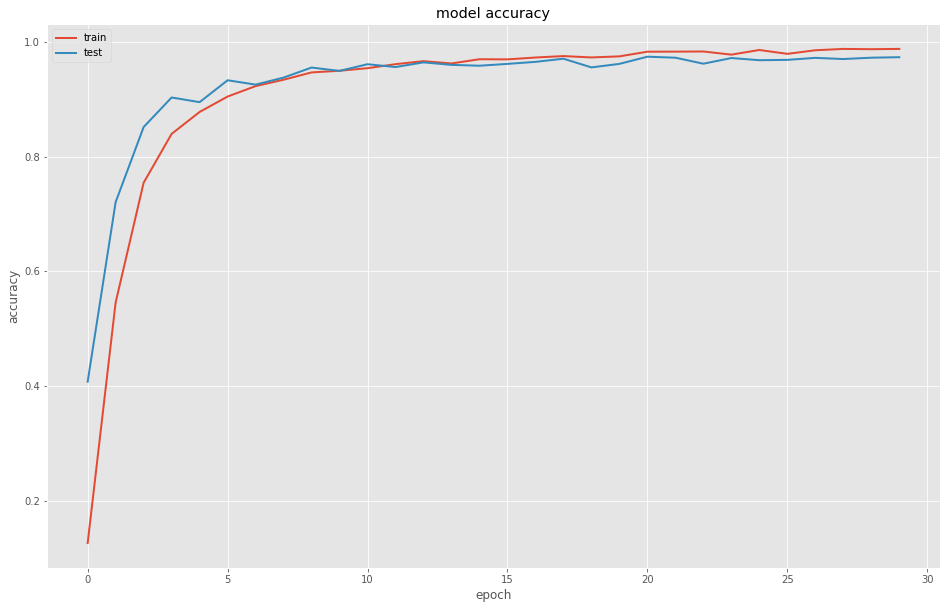

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range(36):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(x_test[i])

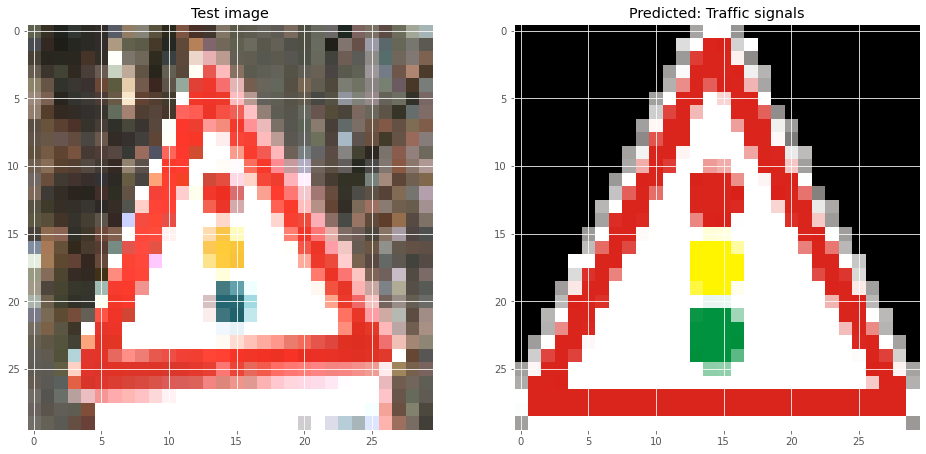

In [ ]:
image_index=345
n = np.array(x_test[image_index])
p = n.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)
index_classes=model.predict(p).argmax()
pred = classes[index_classes]

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.imshow(x_test[image_index])
plt.title("Test image")

plt.subplot(1, 2, 2) # index 2
plt.imshow(load_img('Meta/'+str(index_classes)+'.png', target_size=(IMG_WIDTH, IMG_HEIGHT)))
plt.title("Predicted: {}".format(pred))

plt.show()

In [ ]:
uploaded_img = load_img('tes5.png', target_size=(IMG_HEIGHT, IMG_WIDTH))
uploaded_image = img_to_array(uploaded_img)
uploaded_image/=255

n = np.array(uploaded_image)
p = n.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)
index_classes=model.predict(p).argmax()
pred = classes[index_classes]

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.imshow(uploaded_image)
plt.title("Uploaded image")

plt.subplot(1, 2, 2) # index 2
plt.imshow(load_img('Meta/'+str(index_classes)+'.png', target_size=(IMG_WIDTH, IMG_HEIGHT)))
plt.title("Predicted: {}".format(pred))

plt.show()